# Computer Vision Homework 3: Big vs Small Models

## Brief

Due date: Nov 13, 2023

Required files: `homework-3.ipynb`, `report.pdf`

To download the jupyter notebook from colab, you can refer to the colab tutorial we gave.


## Codes for Problem 1 and Problem 2

### Import Packages

In [1]:
import glob
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from PIL import Image
from torch.utils.data import DataLoader, Dataset, RandomSampler
from torchvision import transforms, models, datasets
from tqdm import tqdm

%matplotlib inline

### Check GPU Environment

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


In [3]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4dead021-a373-2f96-bebc-2a9ff06699ac)


### Set the Seed to Reproduce the Result

In [4]:
def set_all_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
set_all_seed(123)

### Create Dataset and Dataloader

In [5]:
batch_size = 256

mean = (0.4914, 0.4822, 0.4465)
std = (0.2471, 0.2435, 0.2616)
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=train_transform)
valid_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=test_transform)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

sixteenth_train_sampler = RandomSampler(train_dataset, num_samples=len(train_dataset)//16)
half_train_sampler = RandomSampler(train_dataset, num_samples=len(train_dataset)//2)

sixteenth_train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=sixteenth_train_sampler)
half_train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=half_train_sampler)

100%|██████████| 170498071/170498071 [00:06<00:00, 26446891.32it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Load Models

In [6]:
# HINT: Remember to change the model to 'resnet50' and the weights to weights="IMAGENET1K_V1" when needed.
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)

# Background: The original resnet18 is designed for ImageNet dataset to predict 1000 classes.
# TODO: Change the output of the model to 10 class.
model.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model=model.to(device)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


### Training and Testing Models

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 145MB/s]
100%|██████████| 40/40 [00:02<00:00, 13.56it/s]


Epoch  1: Loss = 1.4916 Acc = 0.09 Test_Loss = 1.3122 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch  2: Loss = 1.0794 Acc = 0.12 Test_Loss = 1.3815 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch  3: Loss = 1.0542 Acc = 0.13 Test_Loss = 1.0284 Test_Acc = 0.66


100%|██████████| 40/40 [00:02<00:00, 13.83it/s]


Epoch  4: Loss = 0.9171 Acc = 0.14 Test_Loss = 0.8810 Test_Acc = 0.71


100%|██████████| 40/40 [00:02<00:00, 14.21it/s]


Epoch  5: Loss = 0.8894 Acc = 0.14 Test_Loss = 0.9067 Test_Acc = 0.69


100%|██████████| 40/40 [00:02<00:00, 13.68it/s]


Epoch  6: Loss = 0.7775 Acc = 0.15 Test_Loss = 0.9138 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 11.17it/s]


Epoch  7: Loss = 0.8446 Acc = 0.14 Test_Loss = 0.8459 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.80it/s]


Epoch  8: Loss = 0.8395 Acc = 0.14 Test_Loss = 0.7735 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 14.29it/s]


Epoch  9: Loss = 0.8010 Acc = 0.14 Test_Loss = 0.7690 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 12.77it/s]


Epoch 10: Loss = 0.7631 Acc = 0.15 Test_Loss = 0.7135 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch 11: Loss = 0.7596 Acc = 0.15 Test_Loss = 0.7109 Test_Acc = 0.76


100%|██████████| 40/40 [00:02<00:00, 13.65it/s]


Epoch 12: Loss = 0.8430 Acc = 0.14 Test_Loss = 0.7400 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.63it/s]


Epoch 13: Loss = 0.6902 Acc = 0.15 Test_Loss = 0.6573 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 13.41it/s]


Epoch 14: Loss = 0.6638 Acc = 0.16 Test_Loss = 0.6894 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 15: Loss = 0.7925 Acc = 0.15 Test_Loss = 0.7423 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 14.07it/s]


Epoch 16: Loss = 0.7837 Acc = 0.15 Test_Loss = 0.7341 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 17: Loss = 0.8784 Acc = 0.14 Test_Loss = 0.8102 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 12.30it/s]


Epoch 18: Loss = 0.7444 Acc = 0.15 Test_Loss = 0.7291 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 12.06it/s]


Epoch 19: Loss = 0.6657 Acc = 0.15 Test_Loss = 0.6736 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 13.95it/s]


Epoch 20: Loss = 0.6694 Acc = 0.15 Test_Loss = 0.6331 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.98it/s]


Epoch 21: Loss = 0.6422 Acc = 0.16 Test_Loss = 0.6353 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.94it/s]


Epoch 22: Loss = 0.6192 Acc = 0.16 Test_Loss = 0.6140 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.99it/s]


Epoch 23: Loss = 0.6265 Acc = 0.16 Test_Loss = 0.6230 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.83it/s]


Epoch 24: Loss = 0.6298 Acc = 0.16 Test_Loss = 0.6024 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch 25: Loss = 0.6133 Acc = 0.16 Test_Loss = 0.6061 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.39it/s]


Epoch 26: Loss = 0.5789 Acc = 0.16 Test_Loss = 0.5912 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.83it/s]


Epoch 27: Loss = 0.6107 Acc = 0.16 Test_Loss = 0.6079 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.84it/s]


Epoch 28: Loss = 0.5941 Acc = 0.16 Test_Loss = 0.5849 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 29: Loss = 0.5600 Acc = 0.16 Test_Loss = 0.6036 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.91it/s]


Epoch 30: Loss = 0.5518 Acc = 0.16 Test_Loss = 0.6117 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.59it/s]


Epoch 31: Loss = 0.5792 Acc = 0.16 Test_Loss = 0.6630 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch 32: Loss = 0.7170 Acc = 0.15 Test_Loss = 0.6428 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.38it/s]


Epoch 33: Loss = 0.6432 Acc = 0.16 Test_Loss = 0.6160 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.36it/s]


Epoch 34: Loss = 0.5813 Acc = 0.16 Test_Loss = 0.5749 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 35: Loss = 0.5527 Acc = 0.16 Test_Loss = 0.8035 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 14.08it/s]


Epoch 36: Loss = 0.6026 Acc = 0.16 Test_Loss = 0.6016 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch 37: Loss = 0.5422 Acc = 0.16 Test_Loss = 0.5535 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.51it/s]


Epoch 38: Loss = 0.5362 Acc = 0.16 Test_Loss = 0.5818 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 14.33it/s]


Epoch 39: Loss = 0.5274 Acc = 0.16 Test_Loss = 0.5448 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.20it/s]


Epoch 40: Loss = 0.5175 Acc = 0.17 Test_Loss = 0.5739 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]


Epoch 41: Loss = 0.5524 Acc = 0.16 Test_Loss = 0.5564 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 13.10it/s]


Epoch 42: Loss = 0.5209 Acc = 0.16 Test_Loss = 0.5770 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.51it/s]


Epoch 43: Loss = 0.5084 Acc = 0.17 Test_Loss = 0.5994 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.81it/s]


Epoch 44: Loss = 0.6379 Acc = 0.16 Test_Loss = 0.5930 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]


Epoch 45: Loss = 0.5671 Acc = 0.16 Test_Loss = 0.6220 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.95it/s]


Epoch 46: Loss = 0.5944 Acc = 0.16 Test_Loss = 0.5683 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.59it/s]


Epoch 47: Loss = 0.5436 Acc = 0.16 Test_Loss = 0.5780 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.69it/s]


Epoch 48: Loss = 0.4954 Acc = 0.17 Test_Loss = 0.5969 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.73it/s]


Epoch 49: Loss = 0.5084 Acc = 0.17 Test_Loss = 0.5240 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.86it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.4972 Acc = 0.17 Test_Loss = 0.5274 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.82it/s]


Epoch  1: Loss = 1.2573 Acc = 0.22 Test_Loss = 1.2092 Test_Acc = 0.60


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch  2: Loss = 0.8696 Acc = 0.28 Test_Loss = 0.8465 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch  3: Loss = 0.7694 Acc = 0.29 Test_Loss = 0.7778 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 13.68it/s]


Epoch  4: Loss = 0.7306 Acc = 0.30 Test_Loss = 0.7050 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]


Epoch  5: Loss = 0.6532 Acc = 0.31 Test_Loss = 0.7447 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.75it/s]


Epoch  6: Loss = 0.6477 Acc = 0.31 Test_Loss = 0.6929 Test_Acc = 0.76


100%|██████████| 40/40 [00:02<00:00, 13.85it/s]


Epoch  7: Loss = 0.6183 Acc = 0.32 Test_Loss = 0.6406 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.68it/s]


Epoch  8: Loss = 0.6036 Acc = 0.32 Test_Loss = 0.6874 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 13.29it/s]


Epoch  9: Loss = 0.5714 Acc = 0.32 Test_Loss = 0.6297 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.61it/s]


Epoch 10: Loss = 0.5711 Acc = 0.32 Test_Loss = 0.6550 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch 11: Loss = 0.5325 Acc = 0.33 Test_Loss = 0.6057 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.69it/s]


Epoch 12: Loss = 0.5274 Acc = 0.33 Test_Loss = 0.6051 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.89it/s]


Epoch 13: Loss = 0.5107 Acc = 0.33 Test_Loss = 0.6124 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.07it/s]


Epoch 14: Loss = 0.5180 Acc = 0.33 Test_Loss = 0.6254 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]


Epoch 15: Loss = 0.5011 Acc = 0.33 Test_Loss = 0.6614 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.62it/s]


Epoch 16: Loss = 0.5069 Acc = 0.33 Test_Loss = 0.6424 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 17: Loss = 0.4586 Acc = 0.34 Test_Loss = 0.5389 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 12.04it/s]


Epoch 18: Loss = 0.4525 Acc = 0.34 Test_Loss = 0.5337 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 19: Loss = 0.4555 Acc = 0.34 Test_Loss = 0.5362 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.29it/s]


Epoch 20: Loss = 0.4458 Acc = 0.34 Test_Loss = 0.5168 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 21: Loss = 0.4222 Acc = 0.34 Test_Loss = 0.5357 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 22: Loss = 0.4157 Acc = 0.34 Test_Loss = 0.5503 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.89it/s]


Epoch 23: Loss = 0.4080 Acc = 0.34 Test_Loss = 0.5354 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]


Epoch 24: Loss = 0.4544 Acc = 0.34 Test_Loss = 0.4989 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.38it/s]


Epoch 25: Loss = 0.4394 Acc = 0.34 Test_Loss = 0.5262 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch 26: Loss = 0.4214 Acc = 0.34 Test_Loss = 0.5193 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.00it/s]


Epoch 27: Loss = 0.4098 Acc = 0.34 Test_Loss = 0.5018 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.75it/s]


Epoch 28: Loss = 0.3839 Acc = 0.35 Test_Loss = 0.5483 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.53it/s]


Epoch 29: Loss = 0.4004 Acc = 0.35 Test_Loss = 0.5423 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.61it/s]


Epoch 30: Loss = 0.3938 Acc = 0.35 Test_Loss = 0.5259 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.22it/s]


Epoch 31: Loss = 0.3774 Acc = 0.35 Test_Loss = 0.4863 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.56it/s]


Epoch 32: Loss = 0.3704 Acc = 0.35 Test_Loss = 0.5080 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.65it/s]


Epoch 33: Loss = 0.3575 Acc = 0.35 Test_Loss = 0.4967 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 34: Loss = 0.3446 Acc = 0.35 Test_Loss = 0.5128 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.79it/s]


Epoch 35: Loss = 0.3434 Acc = 0.35 Test_Loss = 0.4945 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.65it/s]


Epoch 36: Loss = 0.4458 Acc = 0.34 Test_Loss = 0.5029 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.28it/s]


Epoch 37: Loss = 0.3729 Acc = 0.35 Test_Loss = 0.5158 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.34it/s]


Epoch 38: Loss = 0.3486 Acc = 0.35 Test_Loss = 0.5177 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.51it/s]


Epoch 39: Loss = 0.3406 Acc = 0.35 Test_Loss = 0.5009 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.34it/s]


Epoch 40: Loss = 0.3688 Acc = 0.35 Test_Loss = 0.5380 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch 41: Loss = 0.3526 Acc = 0.35 Test_Loss = 0.5123 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 42: Loss = 0.3476 Acc = 0.35 Test_Loss = 0.5033 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 43: Loss = 0.3207 Acc = 0.36 Test_Loss = 0.5216 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 44: Loss = 0.3399 Acc = 0.35 Test_Loss = 0.4875 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.63it/s]


Epoch 45: Loss = 0.3091 Acc = 0.36 Test_Loss = 0.5137 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.52it/s]


Epoch 46: Loss = 0.3037 Acc = 0.36 Test_Loss = 0.4829 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.48it/s]


Epoch 47: Loss = 0.3060 Acc = 0.36 Test_Loss = 0.4925 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.08it/s]


Epoch 48: Loss = 0.3087 Acc = 0.36 Test_Loss = 0.4728 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.52it/s]


Epoch 49: Loss = 0.3057 Acc = 0.36 Test_Loss = 0.4729 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.81it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.3039 Acc = 0.36 Test_Loss = 0.5278 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.34it/s]


Epoch  1: Loss = 1.1353 Acc = 0.36 Test_Loss = 1.0237 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 12.46it/s]


Epoch  2: Loss = 0.7936 Acc = 0.44 Test_Loss = 0.8537 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch  3: Loss = 0.6831 Acc = 0.46 Test_Loss = 0.7872 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch  4: Loss = 0.6453 Acc = 0.47 Test_Loss = 0.6947 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.46it/s]


Epoch  5: Loss = 0.6012 Acc = 0.48 Test_Loss = 0.6575 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]


Epoch  6: Loss = 0.5605 Acc = 0.48 Test_Loss = 0.6488 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.38it/s]


Epoch  7: Loss = 0.5422 Acc = 0.49 Test_Loss = 0.5817 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.11it/s]


Epoch  8: Loss = 0.5175 Acc = 0.49 Test_Loss = 0.5626 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.58it/s]


Epoch  9: Loss = 0.4950 Acc = 0.50 Test_Loss = 0.5599 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.51it/s]


Epoch 10: Loss = 0.4668 Acc = 0.50 Test_Loss = 0.5409 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.27it/s]


Epoch 11: Loss = 0.4627 Acc = 0.51 Test_Loss = 0.5512 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 12.44it/s]


Epoch 12: Loss = 0.4447 Acc = 0.51 Test_Loss = 0.5755 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  9.72it/s]


Epoch 13: Loss = 0.4275 Acc = 0.51 Test_Loss = 0.5093 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.65it/s]


Epoch 14: Loss = 0.4261 Acc = 0.51 Test_Loss = 0.5606 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.56it/s]


Epoch 15: Loss = 0.4196 Acc = 0.51 Test_Loss = 0.4855 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.61it/s]


Epoch 16: Loss = 0.4154 Acc = 0.51 Test_Loss = 0.5185 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 14.12it/s]


Epoch 17: Loss = 0.3874 Acc = 0.52 Test_Loss = 0.4915 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.28it/s]


Epoch 18: Loss = 0.3791 Acc = 0.52 Test_Loss = 0.5249 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch 19: Loss = 0.3701 Acc = 0.52 Test_Loss = 0.4736 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.44it/s]


Epoch 20: Loss = 0.3586 Acc = 0.53 Test_Loss = 0.4861 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.59it/s]


Epoch 21: Loss = 0.3551 Acc = 0.53 Test_Loss = 0.4950 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.59it/s]


Epoch 22: Loss = 0.3373 Acc = 0.53 Test_Loss = 0.5022 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


Epoch 23: Loss = 0.3997 Acc = 0.52 Test_Loss = 0.5313 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 24: Loss = 0.3462 Acc = 0.53 Test_Loss = 0.5119 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.40it/s]


Epoch 25: Loss = 0.3320 Acc = 0.53 Test_Loss = 0.5060 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.64it/s]


Epoch 26: Loss = 0.3246 Acc = 0.53 Test_Loss = 0.4908 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.42it/s]


Epoch 27: Loss = 0.3112 Acc = 0.53 Test_Loss = 0.4783 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.55it/s]


Epoch 28: Loss = 0.3120 Acc = 0.54 Test_Loss = 0.4846 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.21it/s]


Epoch 29: Loss = 0.3109 Acc = 0.54 Test_Loss = 0.4705 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.14it/s]


Epoch 30: Loss = 0.3006 Acc = 0.54 Test_Loss = 0.4757 Test_Acc = 0.85


100%|██████████| 40/40 [00:04<00:00,  9.97it/s]


Epoch 31: Loss = 0.2950 Acc = 0.54 Test_Loss = 0.4838 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.14it/s]


Epoch 32: Loss = 0.2811 Acc = 0.54 Test_Loss = 0.5071 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch 33: Loss = 0.3010 Acc = 0.54 Test_Loss = 0.4751 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.56it/s]


Epoch 34: Loss = 0.2814 Acc = 0.54 Test_Loss = 0.4645 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.87it/s]


Epoch 35: Loss = 0.2773 Acc = 0.54 Test_Loss = 0.4522 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 36: Loss = 0.2658 Acc = 0.54 Test_Loss = 0.4646 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch 37: Loss = 0.2646 Acc = 0.54 Test_Loss = 0.5245 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.72it/s]


Epoch 38: Loss = 0.2569 Acc = 0.55 Test_Loss = 0.4669 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.88it/s]


Epoch 39: Loss = 0.2531 Acc = 0.55 Test_Loss = 0.4924 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.36it/s]


Epoch 40: Loss = 0.2687 Acc = 0.54 Test_Loss = 0.4631 Test_Acc = 0.86


100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch 41: Loss = 0.2489 Acc = 0.55 Test_Loss = 0.4958 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.45it/s]


Epoch 42: Loss = 0.2421 Acc = 0.55 Test_Loss = 0.4734 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.18it/s]


Epoch 43: Loss = 0.2446 Acc = 0.55 Test_Loss = 0.4678 Test_Acc = 0.86


100%|██████████| 40/40 [00:02<00:00, 13.56it/s]


Epoch 44: Loss = 0.2312 Acc = 0.55 Test_Loss = 0.4722 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.69it/s]


Epoch 45: Loss = 0.2459 Acc = 0.55 Test_Loss = 0.4780 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.77it/s]


Epoch 46: Loss = 0.2369 Acc = 0.55 Test_Loss = 0.4658 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 47: Loss = 0.2236 Acc = 0.55 Test_Loss = 0.4915 Test_Acc = 0.86


100%|██████████| 40/40 [00:02<00:00, 13.34it/s]


Epoch 48: Loss = 0.2274 Acc = 0.55 Test_Loss = 0.4816 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.78it/s]


Epoch 49: Loss = 0.2145 Acc = 0.55 Test_Loss = 0.4985 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.2165 Acc = 0.55 Test_Loss = 0.5022 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]


Epoch  1: Loss = 1.0691 Acc = 0.51 Test_Loss = 0.8400 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch  2: Loss = 0.7374 Acc = 0.60 Test_Loss = 0.8098 Test_Acc = 0.73


100%|██████████| 40/40 [00:02<00:00, 13.63it/s]


Epoch  3: Loss = 0.6455 Acc = 0.62 Test_Loss = 0.7018 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 13.63it/s]


Epoch  4: Loss = 0.5864 Acc = 0.64 Test_Loss = 0.6886 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.39it/s]


Epoch  5: Loss = 0.5448 Acc = 0.65 Test_Loss = 0.6765 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch  6: Loss = 0.5103 Acc = 0.66 Test_Loss = 0.5616 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.89it/s]


Epoch  7: Loss = 0.4843 Acc = 0.67 Test_Loss = 0.6029 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]


Epoch  8: Loss = 0.4753 Acc = 0.67 Test_Loss = 0.5602 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.91it/s]


Epoch  9: Loss = 0.4451 Acc = 0.68 Test_Loss = 0.5247 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.91it/s]


Epoch 10: Loss = 0.4355 Acc = 0.68 Test_Loss = 0.5519 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch 11: Loss = 0.4217 Acc = 0.68 Test_Loss = 0.5219 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.01it/s]


Epoch 12: Loss = 0.3957 Acc = 0.69 Test_Loss = 0.5407 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.37it/s]


Epoch 13: Loss = 0.3887 Acc = 0.69 Test_Loss = 0.5183 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.78it/s]


Epoch 14: Loss = 0.3908 Acc = 0.69 Test_Loss = 0.4840 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.06it/s]


Epoch 15: Loss = 0.3618 Acc = 0.70 Test_Loss = 0.5079 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.06it/s]


Epoch 16: Loss = 0.3466 Acc = 0.70 Test_Loss = 0.5102 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.45it/s]


Epoch 17: Loss = 0.3403 Acc = 0.71 Test_Loss = 0.5578 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.66it/s]


Epoch 18: Loss = 0.3417 Acc = 0.71 Test_Loss = 0.4900 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch 19: Loss = 0.3207 Acc = 0.71 Test_Loss = 0.5072 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.28it/s]


Epoch 20: Loss = 0.3182 Acc = 0.71 Test_Loss = 0.4885 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.77it/s]


Epoch 21: Loss = 0.3067 Acc = 0.71 Test_Loss = 0.5461 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.41it/s]


Epoch 22: Loss = 0.3038 Acc = 0.72 Test_Loss = 0.5209 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.88it/s]


Epoch 23: Loss = 0.2913 Acc = 0.72 Test_Loss = 0.4755 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.26it/s]


Epoch 24: Loss = 0.2859 Acc = 0.72 Test_Loss = 0.5090 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 25: Loss = 0.3159 Acc = 0.71 Test_Loss = 0.4710 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch 26: Loss = 0.2726 Acc = 0.72 Test_Loss = 0.5101 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.33it/s]


Epoch 27: Loss = 0.2710 Acc = 0.72 Test_Loss = 0.4520 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.86it/s]


Epoch 28: Loss = 0.2581 Acc = 0.73 Test_Loss = 0.4722 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch 29: Loss = 0.2550 Acc = 0.73 Test_Loss = 0.5057 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 30: Loss = 0.2445 Acc = 0.73 Test_Loss = 0.4702 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.71it/s]


Epoch 31: Loss = 0.2444 Acc = 0.73 Test_Loss = 0.4647 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.93it/s]


Epoch 32: Loss = 0.2376 Acc = 0.73 Test_Loss = 0.4727 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.06it/s]


Epoch 33: Loss = 0.2428 Acc = 0.73 Test_Loss = 0.4797 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.87it/s]


Epoch 34: Loss = 0.2316 Acc = 0.73 Test_Loss = 0.4973 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.71it/s]


Epoch 35: Loss = 0.2205 Acc = 0.74 Test_Loss = 0.5018 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 36: Loss = 0.2161 Acc = 0.74 Test_Loss = 0.5127 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch 37: Loss = 0.2142 Acc = 0.74 Test_Loss = 0.4965 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.75it/s]


Epoch 38: Loss = 0.2105 Acc = 0.74 Test_Loss = 0.5213 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


Epoch 39: Loss = 0.1968 Acc = 0.74 Test_Loss = 0.4999 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.01it/s]


Epoch 40: Loss = 0.1961 Acc = 0.74 Test_Loss = 0.4734 Test_Acc = 0.86


100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch 41: Loss = 0.1947 Acc = 0.74 Test_Loss = 0.4913 Test_Acc = 0.86


100%|██████████| 40/40 [00:02<00:00, 13.86it/s]


Epoch 42: Loss = 0.1913 Acc = 0.74 Test_Loss = 0.5001 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.54it/s]


Epoch 43: Loss = 0.1880 Acc = 0.75 Test_Loss = 0.4982 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.75it/s]


Epoch 44: Loss = 0.1795 Acc = 0.75 Test_Loss = 0.5378 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.64it/s]


Epoch 45: Loss = 0.1819 Acc = 0.75 Test_Loss = 0.4965 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.32it/s]


Epoch 46: Loss = 0.1810 Acc = 0.75 Test_Loss = 0.5243 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.49it/s]


Epoch 47: Loss = 0.1752 Acc = 0.75 Test_Loss = 0.5380 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.39it/s]


Epoch 48: Loss = 0.1682 Acc = 0.75 Test_Loss = 0.5221 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.06it/s]


Epoch 49: Loss = 0.1668 Acc = 0.75 Test_Loss = 0.5075 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.1774 Acc = 0.75 Test_Loss = 0.4947 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.43it/s]


Epoch  1: Loss = 1.0160 Acc = 0.65 Test_Loss = 0.7893 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 13.05it/s]


Epoch  2: Loss = 0.7002 Acc = 0.76 Test_Loss = 0.6614 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 12.99it/s]


Epoch  3: Loss = 0.6108 Acc = 0.79 Test_Loss = 0.6035 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]


Epoch  4: Loss = 0.5636 Acc = 0.81 Test_Loss = 0.6285 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Epoch  5: Loss = 0.5160 Acc = 0.82 Test_Loss = 0.5491 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.23it/s]


Epoch  6: Loss = 0.4798 Acc = 0.84 Test_Loss = 0.5458 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 12.82it/s]


Epoch  7: Loss = 0.4603 Acc = 0.84 Test_Loss = 0.5424 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]


Epoch  8: Loss = 0.4364 Acc = 0.85 Test_Loss = 0.5420 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 12.39it/s]


Epoch  9: Loss = 0.4104 Acc = 0.86 Test_Loss = 0.5036 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 10: Loss = 0.3992 Acc = 0.86 Test_Loss = 0.5027 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.89it/s]


Epoch 11: Loss = 0.3857 Acc = 0.87 Test_Loss = 0.5350 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 12: Loss = 0.3678 Acc = 0.87 Test_Loss = 0.4988 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.30it/s]


Epoch 13: Loss = 0.3481 Acc = 0.88 Test_Loss = 0.4846 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch 14: Loss = 0.3449 Acc = 0.88 Test_Loss = 0.5089 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.10it/s]


Epoch 15: Loss = 0.3287 Acc = 0.89 Test_Loss = 0.4788 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.71it/s]


Epoch 16: Loss = 0.3193 Acc = 0.89 Test_Loss = 0.4651 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.99it/s]


Epoch 17: Loss = 0.3116 Acc = 0.89 Test_Loss = 0.4679 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.83it/s]


Epoch 18: Loss = 0.2992 Acc = 0.89 Test_Loss = 0.4600 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.19it/s]


Epoch 19: Loss = 0.2836 Acc = 0.90 Test_Loss = 0.4519 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.90it/s]


Epoch 20: Loss = 0.2817 Acc = 0.90 Test_Loss = 0.4909 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.96it/s]


Epoch 21: Loss = 0.2651 Acc = 0.91 Test_Loss = 0.4906 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.36it/s]


Epoch 22: Loss = 0.2635 Acc = 0.91 Test_Loss = 0.4586 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch 23: Loss = 0.2563 Acc = 0.91 Test_Loss = 0.4700 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.86it/s]


Epoch 24: Loss = 0.2475 Acc = 0.91 Test_Loss = 0.4716 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.36it/s]


Epoch 25: Loss = 0.2406 Acc = 0.92 Test_Loss = 0.4821 Test_Acc = 0.85


100%|██████████| 40/40 [00:04<00:00,  9.08it/s]


Epoch 26: Loss = 0.2704 Acc = 0.91 Test_Loss = 0.5201 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 27: Loss = 0.2446 Acc = 0.92 Test_Loss = 0.4941 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch 28: Loss = 0.2283 Acc = 0.92 Test_Loss = 0.4741 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.83it/s]


Epoch 29: Loss = 0.2199 Acc = 0.92 Test_Loss = 0.4915 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.40it/s]


Epoch 30: Loss = 0.2134 Acc = 0.92 Test_Loss = 0.5184 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.10it/s]


Epoch 31: Loss = 0.2007 Acc = 0.93 Test_Loss = 0.4925 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.40it/s]


Epoch 32: Loss = 0.1982 Acc = 0.93 Test_Loss = 0.4893 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch 33: Loss = 0.1941 Acc = 0.93 Test_Loss = 0.4755 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.39it/s]


Epoch 34: Loss = 0.1859 Acc = 0.93 Test_Loss = 0.4871 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.59it/s]


Epoch 35: Loss = 0.1813 Acc = 0.94 Test_Loss = 0.4850 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 13.09it/s]


Epoch 36: Loss = 0.1816 Acc = 0.94 Test_Loss = 0.4650 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.88it/s]


Epoch 37: Loss = 0.1766 Acc = 0.94 Test_Loss = 0.5100 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.71it/s]


Epoch 38: Loss = 0.1740 Acc = 0.94 Test_Loss = 0.5010 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Epoch 39: Loss = 0.1678 Acc = 0.94 Test_Loss = 0.4634 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.82it/s]


Epoch 40: Loss = 0.1617 Acc = 0.94 Test_Loss = 0.4687 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.99it/s]


Epoch 41: Loss = 0.1553 Acc = 0.95 Test_Loss = 0.5085 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch 42: Loss = 0.1575 Acc = 0.94 Test_Loss = 0.5179 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.43it/s]


Epoch 43: Loss = 0.1536 Acc = 0.95 Test_Loss = 0.4854 Test_Acc = 0.86


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 44: Loss = 0.1742 Acc = 0.94 Test_Loss = 0.4866 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.28it/s]


Epoch 45: Loss = 0.1528 Acc = 0.95 Test_Loss = 0.5182 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]


Epoch 46: Loss = 0.1433 Acc = 0.95 Test_Loss = 0.5335 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.28it/s]


Epoch 47: Loss = 0.1393 Acc = 0.95 Test_Loss = 0.5108 Test_Acc = 0.86


100%|██████████| 40/40 [00:02<00:00, 13.41it/s]


Epoch 48: Loss = 0.1335 Acc = 0.95 Test_Loss = 0.5536 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 12.85it/s]


Epoch 49: Loss = 0.1325 Acc = 0.95 Test_Loss = 0.5491 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.09it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.1295 Acc = 0.96 Test_Loss = 0.5454 Test_Acc = 0.86


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 150MB/s]
100%|██████████| 40/40 [00:04<00:00,  8.97it/s]


Epoch  1: Loss = 1.4843 Acc = 0.10 Test_Loss = 1.6673 Test_Acc = 0.58


100%|██████████| 40/40 [00:04<00:00,  9.01it/s]


Epoch  2: Loss = 1.0485 Acc = 0.13 Test_Loss = 0.9692 Test_Acc = 0.68


100%|██████████| 40/40 [00:04<00:00,  9.40it/s]


Epoch  3: Loss = 0.9122 Acc = 0.14 Test_Loss = 0.8608 Test_Acc = 0.72


100%|██████████| 40/40 [00:04<00:00,  9.41it/s]


Epoch  4: Loss = 0.8765 Acc = 0.14 Test_Loss = 0.9170 Test_Acc = 0.70


100%|██████████| 40/40 [00:04<00:00,  8.98it/s]


Epoch  5: Loss = 0.8179 Acc = 0.14 Test_Loss = 0.9570 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.71it/s]


Epoch  6: Loss = 0.7760 Acc = 0.15 Test_Loss = 0.7751 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  9.83it/s]


Epoch  7: Loss = 0.7223 Acc = 0.15 Test_Loss = 0.6831 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.13it/s]


Epoch  8: Loss = 0.6828 Acc = 0.15 Test_Loss = 0.6739 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.40it/s]


Epoch  9: Loss = 0.6286 Acc = 0.16 Test_Loss = 0.7291 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 11.06it/s]


Epoch 10: Loss = 0.7243 Acc = 0.15 Test_Loss = 0.6685 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  8.67it/s]


Epoch 11: Loss = 0.6719 Acc = 0.16 Test_Loss = 0.6440 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.64it/s]


Epoch 12: Loss = 0.6587 Acc = 0.16 Test_Loss = 0.6451 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 13: Loss = 0.6932 Acc = 0.16 Test_Loss = 0.6239 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch 14: Loss = 0.6286 Acc = 0.16 Test_Loss = 0.8306 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.69it/s]


Epoch 15: Loss = 0.6625 Acc = 0.16 Test_Loss = 0.6741 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.40it/s]


Epoch 16: Loss = 0.6587 Acc = 0.16 Test_Loss = 0.6643 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.64it/s]


Epoch 17: Loss = 0.5829 Acc = 0.16 Test_Loss = 0.5941 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch 18: Loss = 0.6174 Acc = 0.16 Test_Loss = 0.6202 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Epoch 19: Loss = 0.5567 Acc = 0.16 Test_Loss = 0.6229 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.78it/s]


Epoch 20: Loss = 0.5760 Acc = 0.16 Test_Loss = 0.5803 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.34it/s]


Epoch 21: Loss = 0.6371 Acc = 0.16 Test_Loss = 1.5047 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.48it/s]


Epoch 22: Loss = 0.9431 Acc = 0.14 Test_Loss = 0.9720 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch 23: Loss = 0.7324 Acc = 0.15 Test_Loss = 0.6333 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.43it/s]


Epoch 24: Loss = 0.6745 Acc = 0.15 Test_Loss = 0.6538 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 10.91it/s]


Epoch 25: Loss = 0.5895 Acc = 0.16 Test_Loss = 0.6319 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  9.97it/s]


Epoch 26: Loss = 0.5662 Acc = 0.16 Test_Loss = 0.5742 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  9.51it/s]


Epoch 27: Loss = 0.5645 Acc = 0.16 Test_Loss = 0.5820 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  9.63it/s]


Epoch 28: Loss = 0.5454 Acc = 0.16 Test_Loss = 0.5505 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  9.24it/s]


Epoch 29: Loss = 0.5093 Acc = 0.16 Test_Loss = 0.5408 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  9.16it/s]


Epoch 30: Loss = 0.4703 Acc = 0.17 Test_Loss = 0.5325 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  8.90it/s]


Epoch 31: Loss = 0.5398 Acc = 0.16 Test_Loss = 1.0522 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  9.14it/s]


Epoch 32: Loss = 0.6166 Acc = 0.16 Test_Loss = 0.5563 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  9.11it/s]


Epoch 33: Loss = 0.5550 Acc = 0.16 Test_Loss = 0.5752 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  8.95it/s]


Epoch 34: Loss = 0.5357 Acc = 0.16 Test_Loss = 0.5251 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  9.02it/s]


Epoch 35: Loss = 0.5104 Acc = 0.17 Test_Loss = 0.8104 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  9.52it/s]


Epoch 36: Loss = 0.7316 Acc = 0.15 Test_Loss = 0.8122 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  8.83it/s]


Epoch 37: Loss = 0.6145 Acc = 0.16 Test_Loss = 0.5983 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  9.07it/s]


Epoch 38: Loss = 0.5955 Acc = 0.16 Test_Loss = 0.6075 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  8.97it/s]


Epoch 39: Loss = 0.5842 Acc = 0.16 Test_Loss = 0.5529 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  8.89it/s]


Epoch 40: Loss = 0.6414 Acc = 0.16 Test_Loss = 0.8104 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  8.62it/s]


Epoch 41: Loss = 0.9719 Acc = 0.13 Test_Loss = 0.8062 Test_Acc = 0.72


100%|██████████| 40/40 [00:04<00:00,  9.12it/s]


Epoch 42: Loss = 0.7820 Acc = 0.15 Test_Loss = 0.6980 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.06it/s]


Epoch 43: Loss = 0.7199 Acc = 0.15 Test_Loss = 0.6245 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  9.09it/s]


Epoch 44: Loss = 0.6601 Acc = 0.15 Test_Loss = 0.6477 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  9.25it/s]


Epoch 45: Loss = 0.6190 Acc = 0.16 Test_Loss = 0.7383 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.32it/s]


Epoch 46: Loss = 0.7504 Acc = 0.15 Test_Loss = 0.6403 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  9.34it/s]


Epoch 47: Loss = 0.6378 Acc = 0.16 Test_Loss = 0.6003 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  9.29it/s]


Epoch 48: Loss = 0.5775 Acc = 0.16 Test_Loss = 0.5909 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  9.05it/s]


Epoch 49: Loss = 0.5666 Acc = 0.16 Test_Loss = 0.5672 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  9.24it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.5563 Acc = 0.16 Test_Loss = 0.5354 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.03it/s]


Epoch  1: Loss = 1.2269 Acc = 0.23 Test_Loss = 0.8819 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 11.34it/s]


Epoch  2: Loss = 0.8824 Acc = 0.28 Test_Loss = 0.8047 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.27it/s]


Epoch  3: Loss = 0.8639 Acc = 0.28 Test_Loss = 1.0373 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.41it/s]


Epoch  4: Loss = 0.7420 Acc = 0.30 Test_Loss = 0.7222 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.63it/s]


Epoch  5: Loss = 0.6902 Acc = 0.31 Test_Loss = 0.6764 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.88it/s]


Epoch  6: Loss = 0.8656 Acc = 0.28 Test_Loss = 0.7756 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.04it/s]


Epoch  7: Loss = 0.6758 Acc = 0.31 Test_Loss = 0.6407 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 10.80it/s]


Epoch  8: Loss = 0.6407 Acc = 0.31 Test_Loss = 0.6341 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.40it/s]


Epoch  9: Loss = 0.5818 Acc = 0.32 Test_Loss = 0.6034 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch 10: Loss = 0.5422 Acc = 0.33 Test_Loss = 0.6087 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  9.43it/s]


Epoch 11: Loss = 0.5193 Acc = 0.33 Test_Loss = 0.5198 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]


Epoch 12: Loss = 0.5022 Acc = 0.33 Test_Loss = 0.5800 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.18it/s]


Epoch 13: Loss = 0.5087 Acc = 0.33 Test_Loss = 0.7112 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  8.83it/s]


Epoch 14: Loss = 0.6288 Acc = 0.32 Test_Loss = 0.6130 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.25it/s]


Epoch 15: Loss = 0.5181 Acc = 0.33 Test_Loss = 0.4921 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]


Epoch 16: Loss = 0.4667 Acc = 0.33 Test_Loss = 0.4977 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.06it/s]


Epoch 17: Loss = 0.4385 Acc = 0.34 Test_Loss = 0.5512 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch 18: Loss = 0.4280 Acc = 0.34 Test_Loss = 0.5125 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.39it/s]


Epoch 19: Loss = 0.4673 Acc = 0.34 Test_Loss = 0.4982 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.62it/s]


Epoch 20: Loss = 0.4400 Acc = 0.34 Test_Loss = 0.4938 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.35it/s]


Epoch 21: Loss = 0.4221 Acc = 0.34 Test_Loss = 0.5483 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.37it/s]


Epoch 22: Loss = 0.7074 Acc = 0.31 Test_Loss = 3.8489 Test_Acc = 0.58


100%|██████████| 40/40 [00:04<00:00,  8.03it/s]


Epoch 23: Loss = 0.7802 Acc = 0.30 Test_Loss = 1.9754 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 24: Loss = 0.7807 Acc = 0.30 Test_Loss = 0.6151 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 10.55it/s]


Epoch 25: Loss = 0.5598 Acc = 0.32 Test_Loss = 0.5325 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.67it/s]


Epoch 26: Loss = 0.5081 Acc = 0.33 Test_Loss = 0.5638 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch 27: Loss = 0.4774 Acc = 0.33 Test_Loss = 0.4958 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.21it/s]


Epoch 28: Loss = 0.4264 Acc = 0.34 Test_Loss = 0.4768 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.08it/s]


Epoch 29: Loss = 0.4012 Acc = 0.34 Test_Loss = 0.4900 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]


Epoch 30: Loss = 0.3903 Acc = 0.35 Test_Loss = 0.5215 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  8.98it/s]


Epoch 31: Loss = 0.3896 Acc = 0.35 Test_Loss = 0.4641 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.52it/s]


Epoch 32: Loss = 0.3845 Acc = 0.35 Test_Loss = 0.6141 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.65it/s]


Epoch 33: Loss = 0.6143 Acc = 0.32 Test_Loss = 1.1116 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 10.13it/s]


Epoch 34: Loss = 0.8234 Acc = 0.29 Test_Loss = 0.8595 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch 35: Loss = 0.6012 Acc = 0.32 Test_Loss = 0.5577 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.24it/s]


Epoch 36: Loss = 0.4849 Acc = 0.33 Test_Loss = 0.5034 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.26it/s]


Epoch 37: Loss = 0.4372 Acc = 0.34 Test_Loss = 0.4646 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 38: Loss = 0.4042 Acc = 0.34 Test_Loss = 0.4693 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.33it/s]


Epoch 39: Loss = 0.3889 Acc = 0.35 Test_Loss = 0.5059 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.41it/s]


Epoch 40: Loss = 0.3769 Acc = 0.35 Test_Loss = 0.4574 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.43it/s]


Epoch 41: Loss = 0.3760 Acc = 0.35 Test_Loss = 0.4314 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.51it/s]


Epoch 42: Loss = 0.3479 Acc = 0.35 Test_Loss = 0.4541 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.17it/s]


Epoch 43: Loss = 0.3291 Acc = 0.35 Test_Loss = 0.4470 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.45it/s]


Epoch 44: Loss = 0.3368 Acc = 0.35 Test_Loss = 0.4479 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.81it/s]


Epoch 45: Loss = 0.3419 Acc = 0.35 Test_Loss = 0.4543 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch 46: Loss = 0.3438 Acc = 0.35 Test_Loss = 0.4329 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.41it/s]


Epoch 47: Loss = 0.3176 Acc = 0.36 Test_Loss = 0.4431 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.53it/s]


Epoch 48: Loss = 0.3037 Acc = 0.36 Test_Loss = 0.4135 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]


Epoch 49: Loss = 0.3157 Acc = 0.36 Test_Loss = 0.4405 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.13it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.3057 Acc = 0.36 Test_Loss = 0.4459 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch  1: Loss = 1.0884 Acc = 0.37 Test_Loss = 0.9371 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.21it/s]


Epoch  2: Loss = 0.7758 Acc = 0.44 Test_Loss = 0.7929 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  9.26it/s]


Epoch  3: Loss = 0.6394 Acc = 0.47 Test_Loss = 0.6995 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.46it/s]


Epoch  4: Loss = 0.6338 Acc = 0.47 Test_Loss = 0.6148 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch  5: Loss = 0.6311 Acc = 0.47 Test_Loss = 1.5621 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.50it/s]


Epoch  6: Loss = 0.7282 Acc = 0.46 Test_Loss = 0.9254 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.19it/s]


Epoch  7: Loss = 0.6948 Acc = 0.46 Test_Loss = 0.5891 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch  8: Loss = 0.5257 Acc = 0.49 Test_Loss = 0.5418 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]


Epoch  9: Loss = 0.4899 Acc = 0.50 Test_Loss = 0.5067 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.05it/s]


Epoch 10: Loss = 0.4925 Acc = 0.50 Test_Loss = 0.5280 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch 11: Loss = 0.4448 Acc = 0.51 Test_Loss = 0.4806 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]


Epoch 12: Loss = 0.4441 Acc = 0.51 Test_Loss = 0.5115 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  8.49it/s]


Epoch 13: Loss = 0.4187 Acc = 0.51 Test_Loss = 0.4575 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.47it/s]


Epoch 14: Loss = 0.3932 Acc = 0.52 Test_Loss = 0.4866 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.64it/s]


Epoch 15: Loss = 0.3899 Acc = 0.52 Test_Loss = 0.4648 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.66it/s]


Epoch 16: Loss = 0.3705 Acc = 0.52 Test_Loss = 0.4613 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.68it/s]


Epoch 17: Loss = 0.3678 Acc = 0.52 Test_Loss = 0.4602 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.60it/s]


Epoch 18: Loss = 0.3567 Acc = 0.53 Test_Loss = 0.4533 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.40it/s]


Epoch 19: Loss = 0.3416 Acc = 0.53 Test_Loss = 0.4755 Test_Acc = 0.85


100%|██████████| 40/40 [00:04<00:00,  9.16it/s]


Epoch 20: Loss = 0.3339 Acc = 0.53 Test_Loss = 0.4534 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch 21: Loss = 0.3327 Acc = 0.53 Test_Loss = 0.4510 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch 22: Loss = 0.3452 Acc = 0.53 Test_Loss = 0.4475 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.15it/s]


Epoch 23: Loss = 0.4371 Acc = 0.51 Test_Loss = 0.5160 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.04it/s]


Epoch 24: Loss = 0.3605 Acc = 0.52 Test_Loss = 0.4219 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch 25: Loss = 0.3158 Acc = 0.53 Test_Loss = 0.4591 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch 26: Loss = 0.4184 Acc = 0.52 Test_Loss = 0.4727 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.36it/s]


Epoch 27: Loss = 0.3238 Acc = 0.53 Test_Loss = 0.5030 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.71it/s]


Epoch 28: Loss = 0.2975 Acc = 0.54 Test_Loss = 0.5031 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.65it/s]


Epoch 29: Loss = 0.2945 Acc = 0.54 Test_Loss = 0.4285 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.15it/s]


Epoch 30: Loss = 0.2878 Acc = 0.54 Test_Loss = 0.4251 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]


Epoch 31: Loss = 0.2817 Acc = 0.54 Test_Loss = 0.4587 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Epoch 32: Loss = 0.2757 Acc = 0.54 Test_Loss = 0.4281 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.89it/s]


Epoch 33: Loss = 0.2656 Acc = 0.54 Test_Loss = 0.4487 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.58it/s]


Epoch 34: Loss = 0.2645 Acc = 0.54 Test_Loss = 0.4198 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.68it/s]


Epoch 35: Loss = 0.2518 Acc = 0.55 Test_Loss = 0.4440 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.82it/s]


Epoch 36: Loss = 0.2461 Acc = 0.55 Test_Loss = 0.4440 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.39it/s]


Epoch 37: Loss = 0.2513 Acc = 0.55 Test_Loss = 0.4451 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.54it/s]


Epoch 38: Loss = 0.2396 Acc = 0.55 Test_Loss = 0.4735 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]


Epoch 39: Loss = 0.2517 Acc = 0.55 Test_Loss = 0.4504 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.46it/s]


Epoch 40: Loss = 0.2320 Acc = 0.55 Test_Loss = 0.4314 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.26it/s]


Epoch 41: Loss = 0.2373 Acc = 0.55 Test_Loss = 0.4588 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch 42: Loss = 0.2388 Acc = 0.55 Test_Loss = 0.4410 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch 43: Loss = 0.2225 Acc = 0.55 Test_Loss = 0.4357 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


Epoch 44: Loss = 0.2209 Acc = 0.55 Test_Loss = 0.4531 Test_Acc = 0.86


100%|██████████| 40/40 [00:05<00:00,  7.72it/s]


Epoch 45: Loss = 0.2101 Acc = 0.56 Test_Loss = 0.4240 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]


Epoch 46: Loss = 0.2119 Acc = 0.56 Test_Loss = 0.4478 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.40it/s]


Epoch 47: Loss = 0.2142 Acc = 0.56 Test_Loss = 0.4406 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.23it/s]


Epoch 48: Loss = 0.2103 Acc = 0.56 Test_Loss = 0.4224 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.59it/s]


Epoch 49: Loss = 0.2089 Acc = 0.56 Test_Loss = 0.4255 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.89it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.2090 Acc = 0.55 Test_Loss = 0.4367 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.59it/s]


Epoch  1: Loss = 1.0092 Acc = 0.52 Test_Loss = 0.8031 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Epoch  2: Loss = 0.6727 Acc = 0.61 Test_Loss = 0.6324 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch  3: Loss = 0.6775 Acc = 0.62 Test_Loss = 0.7314 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch  4: Loss = 0.7388 Acc = 0.60 Test_Loss = 0.8995 Test_Acc = 0.70


100%|██████████| 40/40 [00:04<00:00,  9.68it/s]


Epoch  5: Loss = 0.7246 Acc = 0.61 Test_Loss = 121.7145 Test_Acc = 0.36


100%|██████████| 40/40 [00:04<00:00,  9.31it/s]


Epoch  6: Loss = 0.6992 Acc = 0.60 Test_Loss = 0.5941 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  9.15it/s]


Epoch  7: Loss = 0.5314 Acc = 0.65 Test_Loss = 0.5269 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  9.22it/s]


Epoch  8: Loss = 0.4749 Acc = 0.67 Test_Loss = 0.5253 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  9.39it/s]


Epoch  9: Loss = 0.4487 Acc = 0.68 Test_Loss = 0.4638 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.44it/s]


Epoch 10: Loss = 0.4213 Acc = 0.68 Test_Loss = 0.4841 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.20it/s]


Epoch 11: Loss = 0.3995 Acc = 0.69 Test_Loss = 0.4624 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.10it/s]


Epoch 12: Loss = 0.3834 Acc = 0.69 Test_Loss = 0.4915 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.39it/s]


Epoch 13: Loss = 0.3744 Acc = 0.70 Test_Loss = 0.4580 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.13it/s]


Epoch 14: Loss = 0.3614 Acc = 0.70 Test_Loss = 0.5341 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.72it/s]


Epoch 15: Loss = 0.3500 Acc = 0.70 Test_Loss = 0.4601 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.55it/s]


Epoch 16: Loss = 0.3356 Acc = 0.71 Test_Loss = 0.4848 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]


Epoch 17: Loss = 0.3286 Acc = 0.71 Test_Loss = 0.4305 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.53it/s]


Epoch 18: Loss = 0.3225 Acc = 0.71 Test_Loss = 0.4389 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]


Epoch 19: Loss = 0.3100 Acc = 0.71 Test_Loss = 0.4343 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.90it/s]


Epoch 20: Loss = 0.3068 Acc = 0.71 Test_Loss = 0.4217 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.72it/s]


Epoch 21: Loss = 0.3003 Acc = 0.72 Test_Loss = 0.4313 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.77it/s]


Epoch 22: Loss = 0.2876 Acc = 0.72 Test_Loss = 0.4416 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.89it/s]


Epoch 23: Loss = 0.2819 Acc = 0.72 Test_Loss = 0.4462 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.94it/s]


Epoch 24: Loss = 0.2857 Acc = 0.72 Test_Loss = 0.4805 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.61it/s]


Epoch 25: Loss = 0.2816 Acc = 0.72 Test_Loss = 0.4903 Test_Acc = 0.85


100%|██████████| 40/40 [00:04<00:00,  9.39it/s]


Epoch 26: Loss = 0.2648 Acc = 0.73 Test_Loss = 0.4485 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.38it/s]


Epoch 27: Loss = 0.2604 Acc = 0.73 Test_Loss = 0.4102 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  8.99it/s]


Epoch 28: Loss = 0.2530 Acc = 0.73 Test_Loss = 0.4392 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.27it/s]


Epoch 29: Loss = 0.5789 Acc = 0.66 Test_Loss = 0.5688 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  9.47it/s]


Epoch 30: Loss = 0.7472 Acc = 0.61 Test_Loss = 1.1725 Test_Acc = 0.62


100%|██████████| 40/40 [00:04<00:00,  9.67it/s]


Epoch 31: Loss = 0.6874 Acc = 0.61 Test_Loss = 0.6319 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]


Epoch 32: Loss = 0.4744 Acc = 0.67 Test_Loss = 0.9042 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 10.97it/s]


Epoch 33: Loss = 0.5200 Acc = 0.66 Test_Loss = 13.2977 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch 34: Loss = 0.5350 Acc = 0.66 Test_Loss = 2.0765 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch 35: Loss = 0.5133 Acc = 0.66 Test_Loss = 0.4992 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.55it/s]


Epoch 36: Loss = 0.3865 Acc = 0.69 Test_Loss = 0.4490 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch 37: Loss = 0.3193 Acc = 0.71 Test_Loss = 0.4302 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]


Epoch 38: Loss = 0.2817 Acc = 0.72 Test_Loss = 0.4183 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.48it/s]


Epoch 39: Loss = 0.2696 Acc = 0.73 Test_Loss = 0.4114 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.94it/s]


Epoch 40: Loss = 0.2507 Acc = 0.73 Test_Loss = 0.4427 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.87it/s]


Epoch 41: Loss = 0.2420 Acc = 0.73 Test_Loss = 0.4131 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 42: Loss = 0.2272 Acc = 0.74 Test_Loss = 0.4220 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.78it/s]


Epoch 43: Loss = 0.2201 Acc = 0.74 Test_Loss = 0.4369 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.36it/s]


Epoch 44: Loss = 0.2094 Acc = 0.74 Test_Loss = 0.4365 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.70it/s]


Epoch 45: Loss = 0.1993 Acc = 0.74 Test_Loss = 0.4456 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.32it/s]


Epoch 46: Loss = 0.1988 Acc = 0.74 Test_Loss = 0.4248 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.42it/s]


Epoch 47: Loss = 0.1932 Acc = 0.75 Test_Loss = 0.4182 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.63it/s]


Epoch 48: Loss = 0.1870 Acc = 0.75 Test_Loss = 0.4201 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.46it/s]


Epoch 49: Loss = 0.1858 Acc = 0.75 Test_Loss = 0.4542 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.36it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.1833 Acc = 0.75 Test_Loss = 0.4168 Test_Acc = 0.88


100%|██████████| 40/40 [00:03<00:00, 11.80it/s]


Epoch  1: Loss = 0.9553 Acc = 0.67 Test_Loss = 0.7357 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  9.75it/s]


Epoch  2: Loss = 0.7182 Acc = 0.76 Test_Loss = 0.8909 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 11.69it/s]


Epoch  3: Loss = 0.6309 Acc = 0.78 Test_Loss = 0.6453 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]


Epoch  4: Loss = 0.5589 Acc = 0.81 Test_Loss = 0.5140 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.17it/s]


Epoch  5: Loss = 0.5102 Acc = 0.82 Test_Loss = 0.5968 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.90it/s]


Epoch  6: Loss = 0.5107 Acc = 0.83 Test_Loss = 0.5400 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  9.48it/s]


Epoch  7: Loss = 0.4491 Acc = 0.84 Test_Loss = 0.4926 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.74it/s]


Epoch  8: Loss = 0.4027 Acc = 0.86 Test_Loss = 0.5001 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.98it/s]


Epoch  9: Loss = 0.4297 Acc = 0.85 Test_Loss = 0.6676 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  9.89it/s]


Epoch 10: Loss = 0.3855 Acc = 0.87 Test_Loss = 0.4428 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.89it/s]


Epoch 11: Loss = 0.3476 Acc = 0.88 Test_Loss = 0.5353 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.46it/s]


Epoch 12: Loss = 0.3410 Acc = 0.88 Test_Loss = 0.4491 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch 13: Loss = 0.4105 Acc = 0.86 Test_Loss = 0.7554 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 11.43it/s]


Epoch 14: Loss = 0.4760 Acc = 0.84 Test_Loss = 0.4958 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.24it/s]


Epoch 15: Loss = 0.3598 Acc = 0.88 Test_Loss = 0.4264 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]


Epoch 16: Loss = 0.3091 Acc = 0.89 Test_Loss = 0.4264 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.13it/s]


Epoch 17: Loss = 0.2936 Acc = 0.90 Test_Loss = 0.4426 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.74it/s]


Epoch 18: Loss = 0.2794 Acc = 0.90 Test_Loss = 0.4165 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch 19: Loss = 0.2708 Acc = 0.91 Test_Loss = 0.4349 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.14it/s]


Epoch 20: Loss = 0.2622 Acc = 0.91 Test_Loss = 0.4315 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.53it/s]


Epoch 21: Loss = 0.2592 Acc = 0.91 Test_Loss = 0.4339 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 10.84it/s]


Epoch 22: Loss = 0.2489 Acc = 0.91 Test_Loss = 0.4694 Test_Acc = 0.86


100%|██████████| 40/40 [00:04<00:00,  9.25it/s]


Epoch 23: Loss = 0.2402 Acc = 0.91 Test_Loss = 0.4390 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.34it/s]


Epoch 24: Loss = 0.2335 Acc = 0.92 Test_Loss = 0.4328 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.46it/s]


Epoch 25: Loss = 0.2680 Acc = 0.91 Test_Loss = 0.6036 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.82it/s]


Epoch 26: Loss = 0.6583 Acc = 0.79 Test_Loss = 0.6155 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  8.82it/s]


Epoch 27: Loss = 0.3843 Acc = 0.87 Test_Loss = 0.4586 Test_Acc = 0.85


100%|██████████| 40/40 [00:04<00:00,  9.15it/s]


Epoch 28: Loss = 0.2832 Acc = 0.90 Test_Loss = 0.4316 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 29: Loss = 0.2474 Acc = 0.91 Test_Loss = 0.4598 Test_Acc = 0.86


100%|██████████| 40/40 [00:03<00:00, 11.86it/s]


Epoch 30: Loss = 0.2246 Acc = 0.92 Test_Loss = 0.4171 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.88it/s]


Epoch 31: Loss = 0.2084 Acc = 0.93 Test_Loss = 0.4290 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.86it/s]


Epoch 32: Loss = 0.2031 Acc = 0.93 Test_Loss = 0.4203 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.62it/s]


Epoch 33: Loss = 0.1926 Acc = 0.93 Test_Loss = 0.4435 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 12.00it/s]


Epoch 34: Loss = 0.1820 Acc = 0.94 Test_Loss = 0.4279 Test_Acc = 0.88


100%|██████████| 40/40 [00:04<00:00,  9.70it/s]


Epoch 35: Loss = 0.1782 Acc = 0.94 Test_Loss = 0.4406 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.97it/s]


Epoch 36: Loss = 0.1807 Acc = 0.94 Test_Loss = 0.4306 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.41it/s]


Epoch 37: Loss = 0.1692 Acc = 0.94 Test_Loss = 0.4141 Test_Acc = 0.88


100%|██████████| 40/40 [00:03<00:00, 11.89it/s]


Epoch 38: Loss = 0.1668 Acc = 0.94 Test_Loss = 0.4320 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.63it/s]


Epoch 39: Loss = 0.1699 Acc = 0.94 Test_Loss = 0.4560 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.56it/s]


Epoch 40: Loss = 0.1928 Acc = 0.94 Test_Loss = 0.8074 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch 41: Loss = 0.2304 Acc = 0.92 Test_Loss = 0.4305 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.11it/s]


Epoch 42: Loss = 0.1672 Acc = 0.94 Test_Loss = 0.4377 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.73it/s]


Epoch 43: Loss = 0.1524 Acc = 0.95 Test_Loss = 0.4472 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.96it/s]


Epoch 44: Loss = 0.1471 Acc = 0.95 Test_Loss = 0.4569 Test_Acc = 0.88


100%|██████████| 40/40 [00:03<00:00, 11.98it/s]


Epoch 45: Loss = 0.1459 Acc = 0.95 Test_Loss = 0.4428 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.77it/s]


Epoch 46: Loss = 0.1392 Acc = 0.95 Test_Loss = 0.4442 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 10.74it/s]


Epoch 47: Loss = 0.1376 Acc = 0.95 Test_Loss = 0.4644 Test_Acc = 0.87


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]


Epoch 48: Loss = 0.1392 Acc = 0.95 Test_Loss = 0.4775 Test_Acc = 0.87


100%|██████████| 40/40 [00:04<00:00,  9.66it/s]


Epoch 49: Loss = 0.1320 Acc = 0.95 Test_Loss = 0.4564 Test_Acc = 0.88


100%|██████████| 40/40 [00:03<00:00, 12.07it/s]


Epoch 50: Loss = 0.1312 Acc = 0.95 Test_Loss = 0.4633 Test_Acc = 0.88


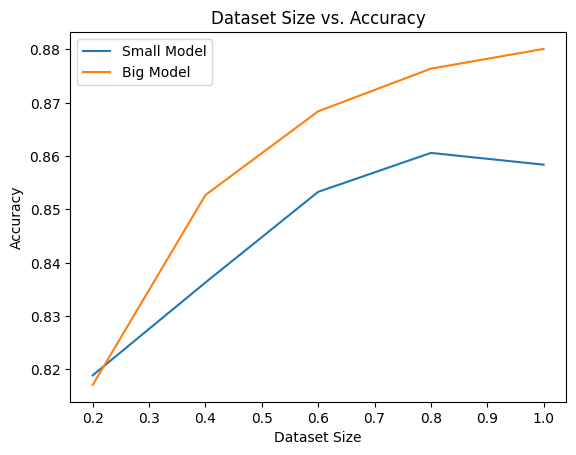

In [7]:
# TODO: Fill in the code cell according to the pytorch tutorial we gave.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
def train(dataloader, model, loss_fn, optimizer):
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    epoch_loss = 0
    correct = 0

    model.train()

    for X, y in tqdm(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pred = pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(y.view_as(pred)).sum().item()

    avg_epoch_loss = epoch_loss / num_batches
    avg_acc = correct / size

    return avg_epoch_loss, avg_acc
def test(dataloader, model, loss_fn):
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    epoch_loss = 0
    correct = 0

    model.eval()

    with torch.no_grad():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)

            pred = model(X)

            epoch_loss += loss_fn(pred, y).item()
            pred = pred.argmax(dim=1, keepdim=True)
            correct += pred.eq(y.view_as(pred)).sum().item()

    avg_epoch_loss = epoch_loss / num_batches
    avg_acc = correct / size

    return avg_epoch_loss, avg_acc
sampler_2 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.2))
sampler_4 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.4))
sampler_6 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.6))
sampler_8 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.8))
dataloader_2 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_2)
dataloader_4 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_4)
dataloader_6 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_6)
dataloader_8 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_8)

epochs = 50
test_acc_small = []
test_acc_big = []

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights="IMAGENET1K_V1")
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_2, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights="IMAGENET1K_V1")
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_4, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights="IMAGENET1K_V1")
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_6, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights="IMAGENET1K_V1")
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_8, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights="IMAGENET1K_V1")
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights="IMAGENET1K_V1")
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_2, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights="IMAGENET1K_V1")
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_4, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights="IMAGENET1K_V1")
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_6, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights="IMAGENET1K_V1")
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_8, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights="IMAGENET1K_V1")
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

dataset_size = [0.2, 0.4, 0.6, 0.8, 1.0]
plt.plot(dataset_size,test_acc_small, label='Small Model')
plt.plot(dataset_size,test_acc_big, label = 'Big Model')
plt.title('Dataset Size vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Dataset Size')
plt.legend()
plt.show()

## Codes for Problem 3

In [8]:
# TODO: Try to achieve the best performance given all training data using whatever model and training strategy.
# (New) (You cannot use the model that was pretrained on CIFAR10)

## Problems

1. (30%) Finish the rest of the codes for Problem 1 and Problem 2 according to the hint. (2 code cells in total.)
2. Train small model (resnet18) and big model (resnet50) from scratch on `sixteenth_train_dataloader`, `half_train_dataloader`, and `train_dataloader` respectively.
3. (30%) Achieve the best performance given all training data using whatever model and training strategy.  
  (You cannot use the model that was pretrained on CIFAR10)



## Discussion

Write down your insights in the report. The file name should be report.pdf.
For the following discussion, please present the results graphically as shown in Fig. 1 and discuss them.

- (30%) The relationship between the accuracy, model size, and the training dataset size.  
    (Total 6 models. Small model trains on the sixteenth, half, and all data. Big model trains on the sixteenth, half, and all data. If the result is different from Fig.1, please explain the possible reasons.)
- (10%) What if we train the ResNet with ImageNet initialized weights (`weights="IMAGENET1K_V1"`).
Please explain why the relationship changed this way?

Hint: You can try different hyperparameters combinations when training the models.

## Credits

1. [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)